In [9]:
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../coco_dataset')

from coco_handler import *

In [10]:
image_data, removed_image_ids = get_image_data(annotations_file, images_dir)
image_detections = get_image_detections(annotations_file, removed_image_ids)
detection_data = get_detection_data(image_data, image_detections)

In [23]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [24]:
cifar_image_detections = {}
cifar_detection_data = {}

for i in range(x_train.shape[0]):
    bbox_dict = {
        'category_id': int(y_train[i])
    }
    
    cifar_image_detections[i] = {
        i: bbox_dict
    }
    
    cifar_detection_data[i] = x_train[i]

LABEL_MAP = {
    0: 'airplane',
    1:'automobile',
    2:'bird',
    3:'cat',
    4:'deer',
    5:'dog',
    6:'frog',
    7:'horse',
    8:'ship',
    9:'truck'
}

cifar_detection_data = cifar_detection_data.copy() 

for k,v in cifar_detection_data.items():
    cifar_detection_data[k] = v / 255.

In [19]:
import data_handler

import importlib
importlib.reload(data_handler)
import data_handler

   
target_classes = ['person', 'motorcycle', 'bicycle', 'car', 'bus', 'truck', 'bird', 'cat', 'dog', 'horse', 'sheep', 'handbag', 'umbrella', 'backpack' 'hot dog', 'pizza', 'donut']
#target_classes = None

data_handler_obj = data_handler.DataHandler(
    image_detections, 
    detection_data, 
    target_classes = target_classes, 
    label_map = LABEL_MAP,
    apply_preprocessing = True
)

data_handler_obj.add_augmentation(flip=True, rotation=True, translation=True, zoom=True, contrast=False)

all_object_categories = data_handler_obj.get_all_object_categories()
print(len(all_object_categories), set(all_object_categories))

MemoryError: Unable to allocate 588. KiB for an array with shape (224, 224, 3) and data type float32

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

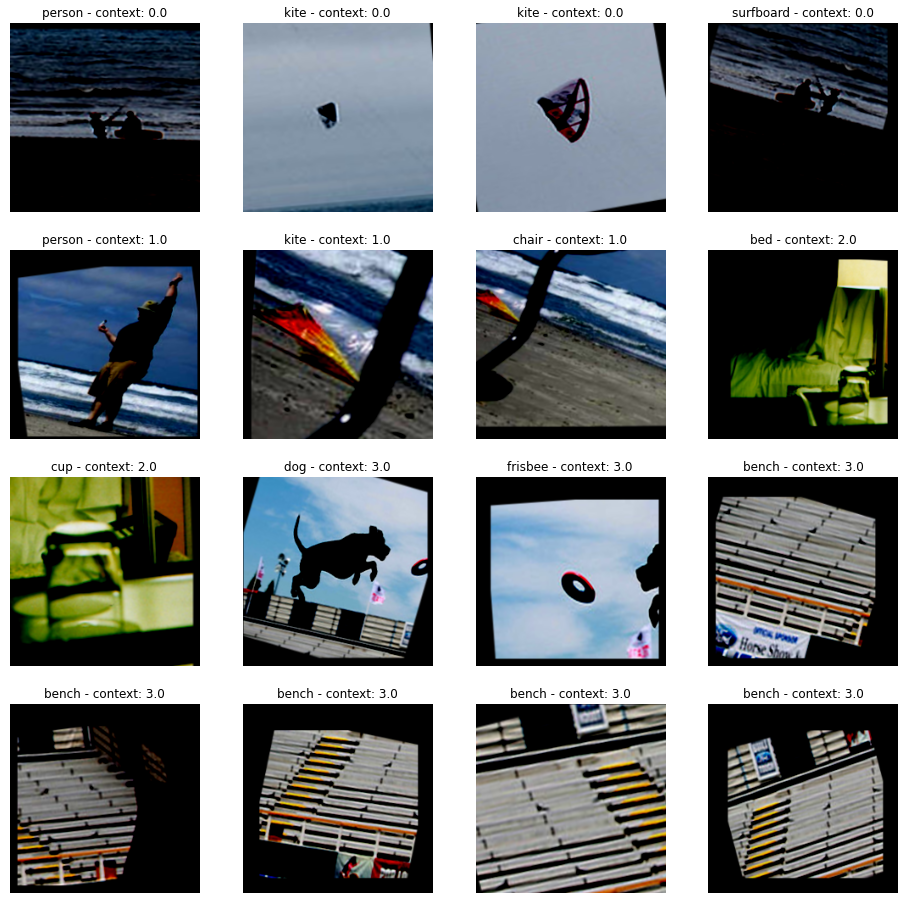

In [14]:
x,y = data_handler_obj.create_batch()
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 16))
plt.axis('off')

columns = 4
rows = 4
for i in range(1, columns*rows +1):
    img = x[i]
    subplot = fig.add_subplot(rows, columns, i)
    subplot.title.set_text('{} - context: {}'.format(LABEL_MAP.get(y[i][0]), y[i][1]))
    subplot.set_axis_off()
    plt.imshow(img)
plt.show()

In [46]:
import importlib
import model_handler
importlib.reload(model_handler)

<module 'model_handler' from 'E:\\Projects\\Code\\Disertation\\Code\\feature_learner\\model_handler.py'>

In [47]:
model_name = 'trained_entity_model_all'

data_handler_obj.remove_augmentation()

model_handler.generate_projector_files(model_name, data_handler_obj, LABEL_MAP, no_samples = 3000, max_category_samples = 400)

{'car': 36, 'bird': 8, 'bicycle': 4, 'motorcycle': 5, 'pizza': 2, 'truck': 3, 'bus': 5, 'donut': 1}
64


In [15]:
import importlib
import model_handler
importlib.reload(model_handler)

model_handler.create_doublehead_model(input_shape = (32,32,3), embedding_size = 128, model_name = 'doublehead_model')

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       7385

Exception ignored in: <bound method EagerResourceDeleter.__del__ of <tensorflow.python.ops.resource_variable_ops.EagerResourceDeleter object at 0x000001F67F451208>>
Traceback (most recent call last):
  File "c:\users\tdr_v\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\ops\resource_variable_ops.py", line 291, in __del__
    self._handle, ignore_lookup_error=True)
  File "c:\users\tdr_v\anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\ops\gen_resource_variable_ops.py", line 244, in destroy_resource_op
    ignore_lookup_error)
KeyboardInterrupt: 


KeyboardInterrupt: 

In [ ]:
model_handler.train_model(
    'doublehead_model', 
    data_handler_obj, 
    new_model_name = 'autoencoder', 
    no_epochs = 30, 
    steps_per_epoch = None, 
    learning_rate = 0.01, 
    entity_loss_weight = 0, 
    context_loss_weight = 0,
    reconstruction_loss_weight = 100,
    freeze_backbone = True, 
    doublehead = True
)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_64 (Conv2D)              (None, 32, 32, 64)   1792        input_17[0][0]                   
__________________________________________________________________________________________________
batch_normalization_138 (BatchN (None, 32, 32, 64)   256         conv2d_64[1][0]                  
__________________________________________________________________________________________________
conv2d_65 (Conv2D)              (None, 32, 32, 64)   36928       batch_normalization_138[1][0]    
______________________________________________________________________________________________

Epoch 8/30
1562/1562 [==============================] - 377s 242ms/step - loss: 1.7572 - batch_normalization_155_loss: 0.0000e+00 - decoder_loss: 0.0176
INFO:tensorflow:Assets written to: .\models\autoencoder_1630943329.5843787\assets
Epoch 9/30
  86/1562 [>.............................] - ETA: 6:03 - loss: 1.6832 - batch_normalization_155_loss: 0.0000e+00 - decoder_loss: 0.0168

In [57]:
pred = model_handler.predict('training_doublehead_model_1630932791.1411123', [x[0]])

In [49]:
print(pred[1].shape)

(1, 32, 32, 3)


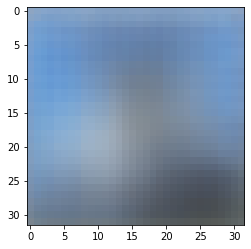

In [60]:
plt.imshow(pred[1][0])